In [1]:
# Core library for data manipulation & analysis
import pandas as pd
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the primary dataset for the Google Step-Up Challenge
# This file contains historical performance metrics for past marketing campaigns.
campaign_data = pd.read_csv("google-step-up-challenge/Historic Campaign Data - Sheet1.csv")

# 1. Understanding the structure
print(f"Dataset Dimensions: {campaign_data.shape[0]} rows and {campaign_data.shape[1]} columns")

# 2. Inspecting data types and non-null counts
campaign_data.info()

Dataset Dimensions: 1664 rows and 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Week_Start     1664 non-null   object
 1   Week_Date      1664 non-null   object
 2   Campaign_Name  1664 non-null   object
 3   Market         1664 non-null   object
 4   Channel        1664 non-null   object
 5   Spend_USD      1664 non-null   int64 
 6   Impressions    1664 non-null   int64 
 7   Reach          1664 non-null   int64 
 8   Conversions    1664 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 117.1+ KB


In [3]:
# Verify data alignment and value formats
campaign_data.head(10)

,Week_Start,Week_Date,Campaign_Name,Market,Channel,Spend_USD,Impressions,Reach,Conversions
0,2023-01-02,2023-01-02,Always_On,UK,YouTube,6212,331780,111134,214
1,2023-01-02,2023-01-02,Always_On,UK,Social,4262,318639,154596,137
2,2023-01-02,2023-01-02,Always_On,UK,Display,2009,515503,101883,18
3,2023-01-02,2023-01-02,Always_On,UK,Search,5513,67707,61330,466
4,2023-01-02,2023-01-02,Always_On,DE,YouTube,5664,426034,190810,173
5,2023-01-02,2023-01-02,Always_On,DE,Social,7944,480628,224773,282
6,2023-01-02,2023-01-02,Always_On,DE,Display,2804,818015,203508,25
7,2023-01-02,2023-01-02,Always_On,DE,Search,3345,48268,40600,305
8,2023-01-02,2023-01-02,Always_On,SA,YouTube,4915,313629,105299,650
9,2023-01-02,2023-01-02,Always_On,SA,Social,3534,253551,114033,448


In [4]:
# Identify redundant rows across all columns
duplicate_rows = campaign_data.duplicated()

# Calculate the total count of duplicate entries
total_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {total_duplicates}")

Number of duplicate rows: 0


## **3. Data Integrity & Constraint Validation**

Before moving into exploratory analysis, I must validate the dataset against the official Google Step-Up Challenge parameters:

* **Budget:** $10M USD

* **Markets:** 4

In [6]:
# Verify the number of unique markets in the raw data
unique_markets = campaign_data["Market"].unique()

print(f"Unique Markets found in data: {unique_markets}")
print(f"Total count: {len(unique_markets)}")

Unique Markets found in data: ['UK' 'DE' 'SA' 'EG']
Total count: 4


In [7]:
# Set the project budget ceiling
BUDGET_CAP = 10_000_000

# Aggregate total spend and calculate the variance
total_spend = campaign_data["Spend_USD"].sum()
overage = total_spend - BUDGET_CAP
pct_overage = (overage / BUDGET_CAP) * 100

print(f"Total Spend: ${total_spend:,.2f}")

# Validation check to flag budget overages 
if total_spend > BUDGET_CAP:
    print(f"⚠️ NOTICE: Budget exceeded by ${overage:,.2f} ({pct_overage:.2f}%)")
else:
    print("✅ Budget within authorized limit.")

Total Spend: $10,617,345.00
⚠️ NOTICE: Budget exceeded by $617,345.00 (6.17%)


#### **3.1 Initial Data Audit Results**

##### Findings:

**Market Scope:** Confirmed✅. The dataset contains exactly 4 unique markets, aligning with the project specifications.

**Budget Compliance:** Discrepancy detected⚠️.The total expenditure is 10,617,345.00 USD, representing a **6.17% variance** over the mandated 10,000,000 USD limit.

**Action Taken:** I will proceed with the analysis of the current data but will highlight this overage in the final recommendations to stakeholders.


### **4. Strategy: Analyzing Markets Individually**
From my preliminary analysis, I noticed that the data varies significantly from one market to another. Looking at them all together would likely hide the real story and lead to a distorted view of the results.

To avoid this, I am splitting the dataset into four groups. This allows me to see exactly how the $10.6M was distributed across each area and get a much clearer picture of what is actually working in each specific market.

In [10]:
# Create masks for each targeted market
uk_mask = campaign_data["Market"] == "UK"
de_mask = campaign_data["Market"] == "DE"
sa_mask = campaign_data["Market"] == "SA"
eg_mask = campaign_data["Market"] == "EG"

# Segment main dataset into market-specific subsets
uk_data = campaign_data[uk_mask]
de_data = campaign_data[de_mask]
sa_data = campaign_data[sa_mask]
eg_data = campaign_data[eg_mask] 


###  **4. 1 Foundational Analysis: Spend vs Conversions**
To understand the baseline performance of each region, I am calculating the total investment and the resulting conversions for each market. Comparing these two metrics side-by-side helps identify where the budget is most heavily concentrated and whether those markets are delivering a proportional number of customers.

In [12]:
# Aggregate spend and conversions for each market subset
market_metrics = {
        "UK": [uk_data["Spend_USD"].sum(), uk_data["Conversions"].sum()],
        "Germany (DE)": [de_data["Spend_USD"].sum(), de_data["Conversions"].sum()],
        "S. Africa (SA)": [sa_data["Spend_USD"].sum(), sa_data["Conversions"].sum()],
        "Egypt (EG)": [eg_data["Spend_USD"].sum(), eg_data["Conversions"].sum()]

}

# Display Results
print(f"{'Market':<15} | {'Total Spend':<15}| {'Conversions':<12}")
print("-" * 48)

for market, values in market_metrics.items():
    print(f"{market:<15} | ${values[0]:>13,.2f} | {values[1]:>11,}")

Market          | Total Spend    | Conversions 
------------------------------------------------
UK              | $ 3,194,600.00 |     134,771
Germany (DE)    | $ 3,187,902.00 |     137,131
S. Africa (SA)  | $ 2,083,640.00 |     338,507
Egypt (EG)      | $ 2,151,203.00 |     340,022


### **4.2 Initial Findings: Regional Efficiency Gap**

Comparing the four markets reveals a significant disparity in performance. While the UK and Germany represent the highest financial investment (totaling over $6.3M), their combined conversions are less than half of what is being generated in South Africa and Egypt.

* **High-Cost Markets:** The UK and Germany are spending an average of $3.19M each to achieve roughly 135k conversions.

* **High-Efficiency Markets:** South Africa and Egypt are spending significantly less (~$2.1M each) but each delivering a much higher volume of over 338k conversions.

This suggests that the **"Cost Per Conversion"** varies drastically by region. My next step is to look into the individual campaign channels within each market to see if certain channels are driving up costs in Europe or if the African markets are simply benefiting from higher-performing platforms

### **Channel Performance Analysis by Market**
To understand what is driving the sharp divide in efficiency  between the European and African markets, I am moving into a granular analysis of each region. I will examine how different campaign channels (such as Social, Search, Display, or YouTube) contributed to these totals.

My goal is to identify if the higher spend in some markets is due to expensive channels or underperforming campaigns.

#### **4.2.1 Analyzing the UK Market**
I’ll start with the UK, as it has the highest total spend ($3,194,600.00) and the lowest conversion count among the four. I want to see which channels are inefficiently consuming this budget.


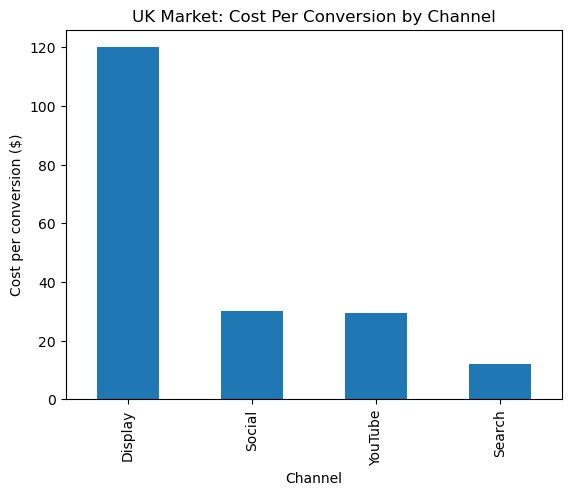

In [54]:
# Grouping UK data by Channel to see spend and conversion distribution
uk_channel_summary = (uk_data.groupby("Channel")[["Spend_USD", "Conversions"]]
                      .sum())
# Calculate Cost Per Conversion (CPC) to measure efficiency
uk_channel_summary["CPC"] = round(uk_channel_summary["Spend_USD"]/uk_channel_summary["Conversions"], 2)

# Sort by CPC to highlight the most expensive channels first
uk_channel_summary = uk_channel_summary.sort_values(by="CPC", ascending=False)
uk_channel_summary["CPC"].plot(kind="bar",
                               title="UK Market: Cost Per Conversion by Channel",
                               xlabel="Channel",
                               ylabel="Cost per conversion ($)"
                              );

The breakdown confirms that Display is the primary driver of the UK's budget overage. While it consumes a significant portion of the funds, its Cost per Conversion (120.00USD) is nearly ten times higher than Search (12.24USD). This confirms that the UK's low conversion count is largely due to heavy investment in an underperforming channel.

#### **4.2.2 Comparative Efficiency: Analyzing Other Markets**

To determine if the high cost of Display is a global trend or specific to the UK, I am extending the Cost Per Conversion (CPC) analysis to the remaining three markets: Germany (DE), South Africa (SA), and Egypt (EG). This comparison will reveal whether the efficiency gap I noticed earlier is driven by specific channels or general market conditions.

In [66]:
# 1. Germany (DE) Channel Analysis
de_channel_summary = de_data.groupby("Channel")[["Spend_USD", "Conversions"]].sum()
de_channel_summary["CPC"] = round(de_channel_summary["Spend_USD"] / de_channel_summary["Conversions"], 2)
de_channel_summary = de_channel_summary.sort_values(by="CPC", ascending=False)

# 2. South Africa (SA) Channel Analysis
sa_channel_summary = sa_data.groupby("Channel")[["Spend_USD", "Conversions"]].sum()
sa_channel_summary["CPC"] = round(sa_channel_summary["Spend_USD"] / sa_channel_summary["Conversions"], 2)
sa_channel_summary = sa_channel_summary.sort_values(by="CPC", ascending=False)

# 3. Egypt (EG) Channel Analysis
eg_channel_summary = eg_data.groupby("Channel")[["Spend_USD", "Conversions"]].sum()
eg_channel_summary["CPC"] = round(eg_channel_summary["Spend_USD"] / eg_channel_summary["Conversions"], 2)
eg_channel_summary = eg_channel_summary.sort_values(by="CPC", ascending=False)

# Display a sample for quick comparison (e.g., Egypt)
print("Egypt Market Efficiency:")
eg_channel_summary

Egypt Market Efficiency:


,Spend_USD,Conversions,CPC
Channel,,,
Display,390429,12204,31.99
Social,599752,74516,8.05
YouTube,579792,73097,7.93
Search,581230,180205,3.23


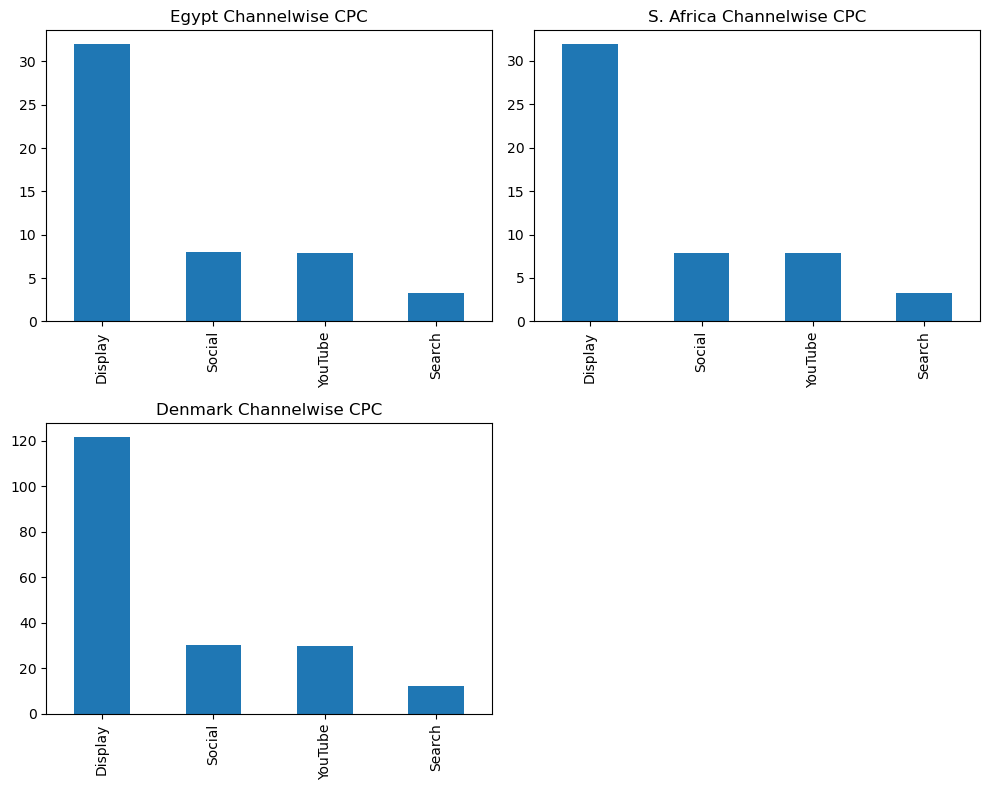

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Egypt's channel cpc
egypt_cpc = axes[0, 0]
eg_channel_summary["CPC"].plot(kind="bar",
                               title="Egypt Channelwise CPC",
                               xlabel="",
                               ylabel="",
                               ax=egypt_cpc)

# South Africa's cpc
sa_cpc = axes[0, 1]
sa_channel_summary["CPC"].plot(kind="bar",
                               title="S. Africa Channelwise CPC",
                               xlabel="",
                               ylabel="",
                               ax=sa_cpc)

# Denmarks cpc
de_cpc = axes[1, 0]
de_channel_summary["CPC"].plot(kind="bar",
                               title="Denmark Channelwise CPC",
                               xlabel="",
                               ylabel="",
                              ax=de_cpc);

# Remove unused axis
axes[1, 1].remove()

# 5. Clean up layout so labels don't overlap
plt.tight_layout()
plt.show()

#### **4.2.3 Comparative Findings: Regional Channel Efficiency Trends**

The cross-market analysis confirms that **Display** is consistently the most expensive channel across all regions. However, the scale of this inefficiency is highly regional:

* **European Markets (UK & DE):** Display costs are extreme, peaking at approximately **$120.00** per conversion. This high baseline is the primary reason these markets are consuming such a large portion of the budget.

* **African Markets (SA & EG):** While Display is still the least efficient channel in these regions, its cost per conversion (roughly **$32.00**) is nearly **4x cheaper** than in the UK and Germany.

* **Global Winner:** **Search** remains the most cost-effective channel globally, consistently delivering the lowest cost per conversion regardless of the region.

#### **4.2.4 Regional Comparative Investigation: Inherent Channel Issue vs. Campaign Failures**

Having identified that Display is globally the least efficient channel, I am now conducting a broader investigation across both the European and African regions —using South Africa (SA) and the UK as representative markets for their respective regions. This deep dive is essential to determine if the high costs are an inherent channel issue or if specific campaign failures are to blame.

In [ ]:
# Isolate Display campaigns for UK
uk_display_campaigns = uk_data[uk_data["Channel"] == "Display"]

# Isolate Display campaigns for S. Africa
sa_display_campaigns = sa_data[sa_data["Channel"] == "Display"]

In [89]:
# Group by Campaign to see individual performance
uk_campaign_audit = (uk_display_campaigns.groupby("Campaign_Name")[["Spend_USD", "Conversions"]]
                     .sum())

# Calculating efficiency per campaign
uk_campaign_audit["CPC"] = round(uk_campaign_audit["Spend_USD"] / uk_campaign_audit["Conversions"], 2)

# Sorting by Spend to find the biggest budget consumers
uk_campaign_audit = uk_campaign_audit.sort_values(by="Spend_USD", ascending=False)

uk_campaign_audit.head(10)

,Spend_USD,Conversions,CPC
Campaign_Name,,,
Always_On,245320,1988,123.40
BackToSchool_24,92968,798,116.50
BackToSchool_23,92449,786,117.62
ExamPrep_23,77359,650,119.01
NewYear_24,40090,346,115.87


In [97]:
# Group by Campaign to see individual performance
sa_campaign_audit = (sa_display_campaigns.groupby("Campaign_Name")[["Spend_USD", "Conversions"]]
                     .sum())

# Calculating efficiency per campaign
sa_campaign_audit["CPC"] = round(sa_campaign_audit["Spend_USD"] / uk_campaign_audit["Conversions"], 2)

# Sorting by Spend to find the biggest budget consumers
sa_campaign_audit = sa_campaign_audit.sort_values(by="Spend_USD", ascending=False)

sa_campaign_audit.head(10)

,Spend_USD,Conversions,CPC
Campaign_Name,,,
Always_On,152258,4696,32.42
BackToSchool_23,57904,1845,31.38
BackToSchool_24,54245,1772,30.61
ExamPrep_23,41924,1280,32.75
NewYear_24,29601,928,31.90


#### **4.2.5 Conclusion: Systematic Channel Inefficiency Across Regions**

The deep dive into campaign-level data for both the UK and South Africa provides a definitive answer to my investigation. By comparing the individual campaigns within the Display channel, a clear pattern of systematic inefficiency has emerged:

* **UK Consistency:** Every campaign targeting the UK market returned a Cost Per Conversion (CPC) within a narrow, expensive range of 115 USD to 123 USD.

* **South Africa Consistency:** Conversely, South African campaigns operated at a much more efficient, yet equally tight range of 31 USD to 32 USD

* **The Findings:** Because the CPC values are nearly identical across all campaigns within a specific region, I can conclude that the issue is not with individual campaign failures. Instead, the **Display channel itself** is an inherently high-cost method for reaching University students, with the scale of that cost dictated by the regional market.

### **4.2.6 Validating Efficiency: A Deep Dive into the "Search" Channel** 

To ensure the high performance of the Search channel is a reliable trend rather than an anomaly, I am conducting a parallel investigation into its campaign-level performance using Denmark (DE) and Egypt (EG) as representative markets. Having identified it as the most cost-effective channel for reaching University students globally, I want to verify if this efficiency is consistent across all campaigns or if the channel is being carried by a single "overperformer."

This validation is crucial for my final recommendation. If Search is consistently efficient across different campaigns and markets, it confirms that the most effective way to reach more students is a systemic shift toward Search-based marketing.

In [114]:
# 1. Auditing Search Campaigns in Denmark (DE)
de_search_audit = (de_data[de_data["Channel"] == "Search"]
                    .groupby("Campaign_Name")[["Spend_USD", "Conversions"]].sum())
de_search_audit["CPC"] = round(de_search_audit["Spend_USD"] / de_search_audit["Conversions"], 2)

# 2. Auditing Search Campaigns in Egypt (EG)
eg_search_audit = (eg_data[eg_data["Channel"] == "Search"]
                    .groupby("Campaign_Name")[["Spend_USD", "Conversions"]].sum())
eg_search_audit["CPC"] = round(eg_search_audit["Spend_USD"] / eg_search_audit["Conversions"], 2)

# Displaying results for the final efficiency check
print("Denmark Search Campaigns - Efficiency Audit:")
print(de_search_audit.sort_values(by="CPC"))
print("\nEgypt Search Campaigns - Efficiency Audit:")
print(eg_search_audit.sort_values(by="CPC"))

Denmark Search Campaigns - Efficiency Audit:
                 Spend_USD  Conversions    CPC
Campaign_Name                                 
Always_On           426509        35670  11.96
BackToSchool_24     143151        11804  12.13
BackToSchool_23     139218        11434  12.18
NewYear_24           80306         6593  12.18
ExamPrep_23         113899         9166  12.43

Egypt Search Campaigns - Efficiency Audit:
                 Spend_USD  Conversions   CPC
Campaign_Name                                
BackToSchool_24      84395        26578  3.18
BackToSchool_23      99605        31246  3.19
Always_On           281774        87217  3.23
ExamPrep_23          69222        21203  3.26
NewYear_24           46234        13961  3.31


#### **4.2.7 Final Validation: Universal Search Efficiency**

This cross-regional audit confirms that Search is the most reliable and scalable channel for reaching University students.

* **Denmark Consistency:** Despite being a high-cost European market, every Search campaign performed within a tight band of 11.96 USD to 12.43 USD per conversion.

* **Egypt Consistency:** In the high-efficiency African market, the Search campaigns were even more effective, holding steady between 3.18 USD and 3.31 USD per conversion.

* **The Conclusion:** Because these efficiencies are uniform across all campaigns within each region (e.g., "Always_On" vs. "ExamPrep"), I can confirm that Search is an inherently superior channel for this demographic.

In [ ]:
campaign_data.loc[campaign_data["cost_per_conversion"] == campaign_data["cost_per_conversion"].max() , ["Conversions", "Spend_USD", "Channel"]]


In [ ]:
sns.boxplot(campaign_data["cost_per_conversion"])

In [ ]:
campaign_data["cost_per_conversion"].hist()

In [ ]:
campaign_data[campaign_data["cost_per_conversion"].between(108.72, 139.11)]["Channel"].value_counts()
# All outliers in "cost_per_conversion" data have their channel as "Display"

In [ ]:
campaign_data[campaign_data["cost_per_conversion"].between(108.72, 139.11)][["Channel", "Market", "Campaign_Name"]]["Market"].value_counts()
# Using Display Channel in UK and DE markets is highly inefficient. All the outliers (which all source back to the Display Channel) 
# are distributed between the UK and DE markets.

In [ ]:
campaign_data[campaign_data["cost_per_conversion"].between(108.72, 139.11)][["Channel", "Market", "Campaign_Name"]]["Campaign_Name"].value_counts()
# The always

In [ ]:
pd.pivot_table(campaign_data, index="Market", columns="Channel", aggfunc="size")


In [ ]:
sorted(campaign_data[campaign_data["Channel"] == "YouTube"]["cost_per_conversion"])

In [ ]:
# Lets aggregate Conversion based on Markets 
tota_spend_per_market = pd.pivot_table(campaign_data, "Spend_USD", "Market", aggfunc="sum")
tota_spend_per_market.sort_values(by="Spend_USD")

In [ ]:
# Mosty efficient channel to use in Denamrk
denmark = campaign_data[campaign_data["Market"] == "DE"]
channel_analysis = pd.pivot_table(denmark, "Conversions", "Channel", aggfunc="sum").sort_values(by="Conversions")
channel_analysis

In [ ]:
# Spend allocation by channel - Denamrk
denmark = campaign_data[campaign_data["Market"] == "DE"]
channel_analysis = pd.pivot_table(denmark, "Spend_USD", "Channel", aggfunc="sum").sort_values(by="Spend_USD")
channel_analysis

In [ ]:
# Lets aggregate Conversion based on Markets 
tota_sales_per_market = pd.pivot_table(campaign_data, "Conversions", "Market", aggfunc="sum")
tota_sales_per_market.sort_values(by="Conversions")

In [ ]:
# Lets aggregate Conversion based on Markets 
tota_spend_per_channel = pd.pivot_table(campaign_data, "Spend_USD", "Channel", aggfunc="sum")
tota_spend_per_channel.sort_values(by="Spend_USD")

In [ ]:
# Lets aggregate Conversion based on Markets 
tota_conversions_per_channel = pd.pivot_table(campaign_data, "Conversions", "Channel", aggfunc="sum")
tota_conversions_per_channel.sort_values(by="Conversions")

In [ ]:
# Plot histograms to check whether there is any irregular distribution across the different numeric features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

num_features = (campaign_data.select_dtypes("number")
                             .drop(columns=["cost_per_conversion", "cost_per_impression", "cost_per_reach"])
                             .columns.to_list())
axes = axes.flatten()
# Select the current axis
for i, col in enumerate(num_features):
    # Select the current axis
    ax = axes[i]
    
    # Plot your data on that specific axis
    ax.hist(campaign_data[col])
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Value")

# 5. Clean up layout so labels don't overlap
plt.tight_layout()
plt.show()

In [ ]:
type(num_features)

In [ ]:
for col in num_features:
    print(campaign_data[col].describe())

In [ ]:
# Balanced Reach/Impression/Conversion data
bottom, top = campaign_data["Impressions"].quantile([0.1, 0.9])
unskewed_map = campaign_data[campaign_data["Impressions"].between(bottom, top)]

# Drop efficiencies determined with skewed data
campaign_data.drop(columns=["cost_per_reach", "cost_per_conversion", "cost_per_impression"],
                                       inplace=True)
# Instantiate an unskewing function
def unskew(col_name):
    
    # Determine the 10th and 90th quantile
    bottom, top = campaign_data[col_name].quantile([0.1, 0.9])
    # Subset campaign_data df with above quantiles as bounds
    unskewed_data = campaign_data[campaign_data[col_name].between(bottom, top)]

    return unskewed_data


In [ ]:
campaign_data.head()

In [ ]:
unskewed_reach = unskew("Reach").copy()
unskewed_impressions = unskew("Impressions").copy()
unskewed_conversions = unskew("Conversions").copy()

In [ ]:
# Calculate efficiencies across reach/impression/conversion (unskewed data)
def efficiencies(df, df_var_name):
    df[f"cp_{df_var_name}"] = df["Spend_USD"]/df["Reach"]
    
    return df


In [ ]:
efficiencies(unskewed_reach, "reach")

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax_top_left = axes[0, 0]
c_per_r_marketwise = pd.pivot_table(efficiencies(unskewed_reach, "reach"), "cp_reach", 
                                    "Market", aggfunc="mean").sort_values(by="cp_reach", ascending=False)
c_per_r_marketwise.plot(kind="bar", ax=ax_top_left)

ax_top_left.set(
    title="Cost Per Reach",
    xlabel="Market",
    ylabel="Mean Cost Per Reach"
)


ax_top_right = axes[0, 1]
c_per_i_marketwise = pd.pivot_table(efficiencies(unskewed_impressions, "impression"), "cp_impression", 
                                    "Market", aggfunc="mean").sort_values(by="cp_impression", ascending=False)
c_per_i_marketwise.plot(kind="bar", ax=ax_top_right)

ax_top_right.set(
    title="Cost Per Impression",
    xlabel="Market",
    ylabel="Mean Cost Per Impression"
)


ax_bottom_right = axes[1, 0]
c_per_c_marketwise = pd.pivot_table(efficiencies(unskewed_conversions, "conversion"), "cp_conversion", 
                                    "Market", aggfunc="mean").sort_values(by="cp_conversion", ascending=False)
c_per_c_marketwise.plot(kind="bar", ax=ax_bottom_right)


ax_bottom_right.set(
    title="Cost Per Conversion",
    xlabel="Market",
    ylabel="Mean Cost Per Conversion"
)


# Remove legend from all subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()


# Remove unused axis
axes[1, 1].remove()
fig.suptitle("Cost Per Target Efficiency Analysis - Marketwise", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax_top_left = axes[0, 0]
c_per_r_channelwise = pd.pivot_table(efficiencies(unskewed_reach, "reach"), "cp_reach", 
                                     "Channel", aggfunc="mean").sort_values(by="cp_reach", ascending=False)
c_per_r_channelwise.plot(kind="bar", ax=ax_top_left)

ax_top_left.set(
    title="Cost Per Reach",
    xlabel="Channel",
    ylabel="Mean Cost Per Reach"
)

ax_top_right = axes[0, 1]
c_per_i_channelwise = pd.pivot_table(efficiencies(unskewed_impressions, "impression"), "cp_impression",
                                     "Channel", aggfunc="mean").sort_values(by="cp_impression", ascending=False)

c_per_i_channelwise.plot(kind="bar", ax=ax_top_right)

ax_top_right.set(  
    title="Cost Per Impression",
    xlabel="Channel",
    ylabel="Mean Cost Per Impression"
)

ax_bottom_left = axes[1, 0]
c_per_c_channelwise = pd.pivot_table(efficiencies(unskewed_conversions, "conversion"), 
                                     "cp_conversion", "Channel", aggfunc="mean").sort_values(by="cp_conversion", ascending=False)
c_per_c_channelwise.plot(kind="bar", ax=ax_bottom_left)

ax_bottom_left.set( 
    title="Cost Per Conversion",
    xlabel="Channel",
    ylabel="Mean Cost Per Conversion"
)

# Remove legend from all subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()
        
# Remove unused axis
axes[1, 1].remove()
fig.suptitle("Cost Per Target Efficiency Analysis - Channelwise", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax_r = axes[0, 0]
c_per_r_campaignwise = pd.pivot_table(efficiencies(unskewed_reach, "reach"), "cp_reach", 
                                      "Campaign_Name", aggfunc="mean").sort_values(by="cp_reach", ascending=False)
c_per_r_campaignwise.plot(kind="bar", ax=ax_r)

ax_r.set( 
    title="Cost Per Reach",
    xlabel="Campaign",
    ylabel="Mean Cost Per Reach"
)

ax_i = axes[0, 1]
c_per_i_campaignwise = pd.pivot_table(efficiencies(unskewed_impressions, "impression"), "cp_impression",
                                      "Campaign_Name", aggfunc="mean").sort_values(by="cp_impression", ascending=False)
c_per_i_campaignwise.plot(kind="bar", ax=ax_i)

ax_i.set( 
    title="Cost Per Impression",
    xlabel="Campaign",
    ylabel="Mean Cost Per Impression"
)


ax_c = axes[1, 0]
c_per_c_campaignwise = pd.pivot_table(efficiencies(unskewed_conversions, "conversion"), "cp_conversion", 
                                      "Campaign_Name", aggfunc="mean").sort_values(by="cp_conversion", ascending=False)
c_per_c_campaignwise.plot(kind="bar", ax=ax_c)

ax_c.set( 
    title="Cost Per Conversion",
    xlabel="Campaign",
    ylabel="Mean Cost Per Conversion"
)


# Remove legend from all subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()
        
# Remove unused axis
axes[1, 1].remove()
fig.suptitle("Cost Per Target Efficiency Analysis - Campaignwise", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

In [ ]:
south_africa = campaign_data[campaign_data["Market"] == "SA"]
channel_efficiency_sa = pd.pivot_table(south_africa, "Conversions", "Channel", aggfunc="sum").sort_values(by="Conversions")
channel_efficiency_sa

In [ ]:
spend_efficiency_sa = pd.pivot_table(south_africa, "Spend_USD", "Channel", aggfunc="sum").sort_values(by="Spend_USD")
spend_efficiency_sa

In [ ]:
UK = campaign_data[campaign_data["Market"] == "UK"]
channel_efficiency_uk = pd.pivot_table(UK, "Conversions", "Channel", aggfunc="sum").sort_values(by="Conversions")
channel_efficiency_uk

In [ ]:
UK = campaign_data[campaign_data["Market"] == "UK"]
channel_efficiency_uk = pd.pivot_table(UK, "Spend_USD", "Channel", aggfunc="sum").sort_values(by="Spend_USD")
channel_efficiency_uk

# Evaluating Campaign Perfomance by Market


# Denamrk


In [ ]:
campaign_analysis_denmark = pd.pivot_table(denmark, "Conversions", "Campaign_Name", aggfunc="sum").sort_values(by="Conversions")
campaign_analysis_denmark

In [ ]:
campaign_spend_denmark = pd.pivot_table(denmark, "Spend_USD", "Campaign_Name", aggfunc="sum").sort_values(by="Spend_USD")
campaign_spend_denmark